In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

# A) Data Preparation


In [3]:
df = pd.read_csv('training_companydata.csv')


In [4]:
column_names = df.columns

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X66,X63,X64,X65
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0,4.1486,3.2732,107.350,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.241140,0.81774,0.76599,0.69484,4.9909,3.951,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.12444,6.3985,4.3158,127.210,2.8692,7.898,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      7027 non-null   object 
 1   X2      7027 non-null   object 
 2   X3      7027 non-null   object 
 3   X4      7027 non-null   object 
 4   X5      7027 non-null   object 
 5   X6      7027 non-null   object 
 6   X7      7027 non-null   object 
 7   X8      7027 non-null   object 
 8   X9      7027 non-null   object 
 9   X10     7027 non-null   object 
 10  X11     7027 non-null   object 
 11  X12     7027 non-null   object 
 12  X13     7027 non-null   float64
 13  X14     7027 non-null   object 
 14  X15     7027 non-null   object 
 15  X16     7027 non-null   object 
 16  X17     7027 non-null   object 
 17  X18     7027 non-null   object 
 18  X19     7027 non-null   float64
 19  X20     7027 non-null   float64
 20  X21     7027 non-null   object 
 21  X22     7027 non-null   object 
 22  

In [7]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X66', 'X63', 'X64', 'X65'],
      dtype='object')

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
missing_values_percentage =  (df == '?').sum() / len(df) *100
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': missing_values_percentage})
missing_value_df          

,column_name,percent_missing
X1,X1,0.042692
X2,X2,0.042692
X3,X3,0.042692
X4,X4,0.426925
X5,X5,0.113847
X6,X6,0.042692
X7,X7,0.042692
X8,X8,0.355771
X9,X9,0.014231
X10,X10,0.042692


In [10]:
df.drop(columns=['X21','X37'], inplace=True)
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X22',
       'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32',
       'X33', 'X34', 'X35', 'X36', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43',
       'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53',
       'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X66', 'X63',
       'X64', 'X65'],
      dtype='object')

In [11]:
number_missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'numbers_missing': (df == '?').sum()})
number_missing_value_df

,column_name,numbers_missing
X1,X1,3
X2,X2,3
X3,X3,3
X4,X4,30
X5,X5,8
X6,X6,3
X7,X7,3
X8,X8,25
X9,X9,1
X10,X10,3


In [12]:
df.replace('?', np.nan, inplace=True)
for col in df.columns:
    mean=df[col].astype(float).mean()
    df[col] = df[col].fillna(mean)
    
df.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
X58    0
X59    0
X60    0
X61    0
X66    0
X63    0
X64    0
X65    0
dtype: int64

In [13]:
'''
from sklearn.preprocessing import MinMaxScaler

X = df.drop(columns='X65')  
y = df['X65']  

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=df.index)

df = pd.concat([X_scaled_df, y], axis=1)

df.head()
'''

"\nfrom sklearn.preprocessing import MinMaxScaler\n\nX = df.drop(columns='X65')  \ny = df['X65']  \n\nscaler = MinMaxScaler()\n\nX_scaled = scaler.fit_transform(X)\n\nX_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=df.index)\n\ndf = pd.concat([X_scaled_df, y], axis=1)\n\ndf.head()\n"

## Unbalanced Dataset

In [14]:
class_counts = df['X65'].value_counts()

class_percentages = (class_counts / len(df)) * 100

print("Class counts:\n", class_counts)
print("\nClass percentages:\n", class_percentages)

Class counts:
 X65
0    6756
1     271
Name: count, dtype: int64

Class percentages:
 X65
0    96.143447
1     3.856553
Name: count, dtype: float64


Using SMOTE(Synthetic Minority Over-sampling Technique) to handle unbalanced dataset

In [15]:
from imblearn.over_sampling import SMOTE

X = df.drop('X65', axis=1)  
y = df['X65']

smote = SMOTE(random_state=42)

X_new, y_new = smote.fit_resample(X, y)

df = pd.DataFrame(X_new, columns=X.columns)
df['X65'] = y_new

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X66,X63,X64,X65
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0.24976,0.6598,0.166600,0.24976,497.42,0.73378,2.6349,0.24976,0.149420,43.370,0.21402,0.119980,0.47706,0.50494,0.60411,1.4582,1.7615,5.9443,0.11788,0.149420,94.14,3.8772,0.56393,0.21402,1.741,0.50591,0.128040,0.66295,0.051402,0.128040,114.42,71.050,1.0097,1.5225,49.394,0.1853,0.110850,2.042,0.37854,0.25792,2.2437,2.248,348690.0,0.121960,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0.0,0.25834,0.99601,1.6996,0.49788,0.26114,0.5168,0.158350,0.25834,677.96,0.53838,2.0005,0.25834,0.152000,87.981,0.24806,0.123040,0.540231,0.39542,0.43992,88.444,16.946,3.6884,0.26969,0.152000,122.17,2.9876,2.9876,0.20616,1.6996,0.49788,0.121300,0.086422,0.064371,0.145950,199.49,111.510,0.51045,1.1252,100.13,0.23727,0.139610,1.9447,0.49988,0.33472,17.866,17.866,2304.6,0.121300,0.42002,0.85300,0.0,4.1486,3.2732,107.350,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0.0,0.30906,0.43695,1.309,0.30408,0.31258,0.64184,0.244350,0.30906,794.16,0.45961,1.4369,0.30906,0.236100,73.133,0.3026,0.189960,0.540231,0.28932,0.37282,86.011,1.0627,4.3749,0.41929,0.238150,176.93,2.063,1.4274,0.31565,1.309,0.51537,0.241140,0.32202,0.07402,0.231170,165.51,92.381,0.94807,1.0101,96.372,0.29181,0.222930,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.241140,0.81774,0.76599,0.69484,4.9909,3.951,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,0.1155,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.1155,1.3562,0.57353,0.088995,0.40139,0.069622,0.088995,180.77,100.980,0.2872,1.5696,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545.0,0.054015,0.14207,0.94598,0.0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,0.18732,0.33147,0.121820,0.18732,1133.2,0.32211,1.6307,0.18732,0.115530,57.045,0.19832,0.115530,0.18732,0.38677,0.32211,1.4138,1.1184,4.1424,0.27884,0.115530,147.04,2.4823,0.3234,0.19832,1.6278,0.43489,0.122310,0.29304,0.09668,0.122310,141.62,84.574,0.73919,0.95787,65.936,0.18811,0.116010,1.2959,0.56511,0.40285,1.8839,2.1184,3186.6,0.134850,0.48431,0.86515,0.12444,6.3985,4.3158,127.210,2.8692,7.898,0


check to see the if the dataset has been balanced:

In [16]:
class_counts = df['X65'].value_counts()

class_percentages = (class_counts / len(df)) * 100

print("Class counts:\n", class_counts)
print("\nClass percentages:\n", class_percentages)

Class counts:
 X65
0    6756
1    6756
Name: count, dtype: int64

Class percentages:
 X65
0    50.0
1    50.0
Name: count, dtype: float64


# B) Classification

Models:
LogisticRegression,
GradientBoosting,
RandomForest,
DecisionTree,
SVC

In [17]:
from sklearn.model_selection import GridSearchCV,cross_val_score , train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score, classification_report, confusion_matrix, f1_score,ConfusionMatrixDisplay

Finding the best parameters for each model:

In [18]:
k = 10
seed = 42

## LogisticRegression


In [17]:
X = df.drop('X65', axis=1)
y = df['X65']

param_grid = {
    'C': [0.001,0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'lbfgs', 'saga']  
}

lr =LogisticRegression(max_iter=10000)
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=k, scoring='f1', n_jobs=-1)
grid_search.fit(X, y)


print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'C': 100, 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.6635364193314964
Best Estimator: LogisticRegression(C=100, max_iter=10000)


## GradientBoosting


In [21]:
X = df.drop('X65', axis=1)
y = df['X65']

n_estimators = []
for i in range(1, 20):
    n_estimators.append(5*i)

param_grid = {'n_estimators': n_estimators}
gb = GradientBoostingClassifier(random_state=seed)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=k, scoring='f1',n_jobs=-1)
grid_search.fit(X, y)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'n_estimators': 95}
Best Cross-Validation Score: 0.9417626362854236
Best Estimator: GradientBoostingClassifier(n_estimators=95, random_state=42)


## RandomForest

In [19]:
X = df.drop('X65', axis=1)
y = df['X65']

n_estimators = []
for i in range(1, 20):
    n_estimators.append(5*i)



param_grid = {'n_estimators': n_estimators}
rf = RandomForestClassifier(random_state=seed)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=k, scoring='f1',n_jobs=-1)
grid_search.fit(X, y)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'n_estimators': 75}
Best Cross-Validation Score: 0.9876789414187197
Best Estimator: RandomForestClassifier(n_estimators=75, random_state=42)


## DecisionTree

In [22]:
X = df.drop('X65', axis=1)
y = df['X65']

min_samples_split = []
for i in range(1, 50):
    min_samples_split.append(2*i)
param_grid = {'min_samples_split': min_samples_split}
dt = DecisionTreeClassifier(criterion='entropy')
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=k, scoring='f1')
grid_search.fit(X, y)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'min_samples_split': 4}
Best Cross-Validation Score: 0.9552957351740782
Best Estimator: DecisionTreeClassifier(criterion='entropy', min_samples_split=4)


## SVC

In [23]:
X = df.drop('X65', axis=1)
y = df['X65']

param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

svc = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid ,cv=k,scoring='f1')
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'kernel': 'poly'}
Best Cross-Validation Score: 0.5877719786953886
Best Estimator: SVC(kernel='poly', random_state=42)


## Comparison of the Models 

In [35]:
X = df.drop('X65', axis=1)
y = df['X65']

model_lr =LogisticRegression(C=100, max_iter=10000)
lr_scores = cross_val_score(model_lr, X, y, cv=k, scoring='f1')
avg_lr_score = np.mean(lr_scores)

model_gb =GradientBoostingClassifier(n_estimators=95, random_state=42)
gb_scores = cross_val_score(model_gb, X, y, cv=k, scoring='f1')
avg_gb_score = np.mean(gb_scores)

model_rf = RandomForestClassifier(n_estimators=75, random_state=42)
rf_scores = cross_val_score(model_rf, X, y, cv=k, scoring='f1')
avg_rf_score = np.mean(rf_scores)

model_dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=4)
dt_scores = cross_val_score(model_dt, X, y, cv=k, scoring='f1')
avg_dt_score = np.mean(dt_scores)

model_svc = SVC(kernel='poly', random_state=42)
svc_scores = cross_val_score(model_svc, X, y, cv=k, scoring='f1')
avg_svc_score = np.mean(svc_scores)

print(f"Logistic Regression Fmeasure:{avg_lr_score}")
print(f"Gradient Boosting Fmeasure:{avg_gb_score}")
print(f"Random Forest Fmeasure:{avg_rf_score}")
print(f"Decision Tree Fmeasure:{avg_dt_score}")
print(f"SVC Fmeasure:{avg_svc_score}")



Logistic Regression Fmeasure:0.6634921059266914
Gradient Boosting Fmeasure:0.9417626362854236
Random Forest Fmeasure:0.9876789414187197
Decision Tree Fmeasure:0.9552568274313661
SVC Fmeasure:0.5877719786953886


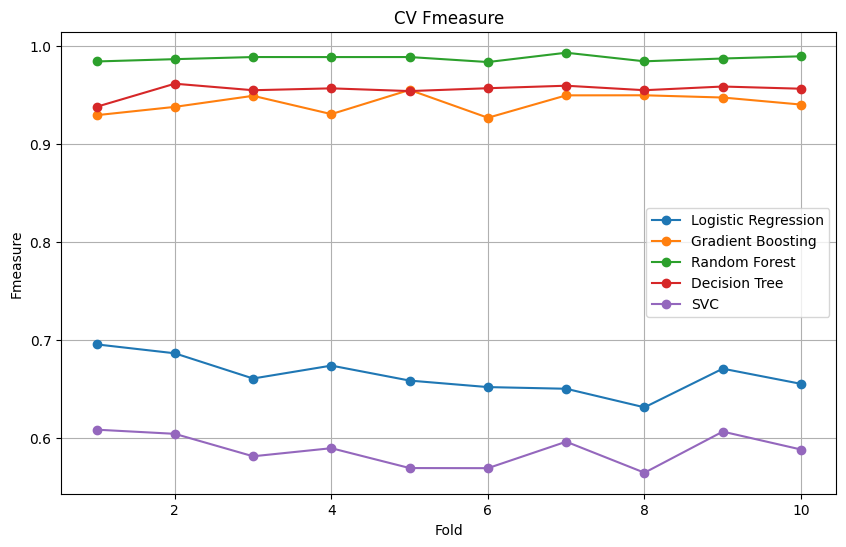

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(lr_scores) + 1), lr_scores, marker='o', label="Logistic Regression")
plt.plot(range(1, len(gb_scores) + 1), gb_scores, marker='o', label="Gradient Boosting")
plt.plot(range(1, len(rf_scores) + 1), rf_scores, marker='o', label="Random Forest")
plt.plot(range(1, len(dt_scores) + 1), dt_scores, marker='o', label="Decision Tree")
plt.plot(range(1, len(svc_scores) + 1), svc_scores, marker='o', label="SVC")
plt.title('CV Fmeasure')
plt.xlabel('Fold')
plt.ylabel('Fmeasure')
plt.grid(True)
plt.legend()
plt.show()

 ## Train the chosen model

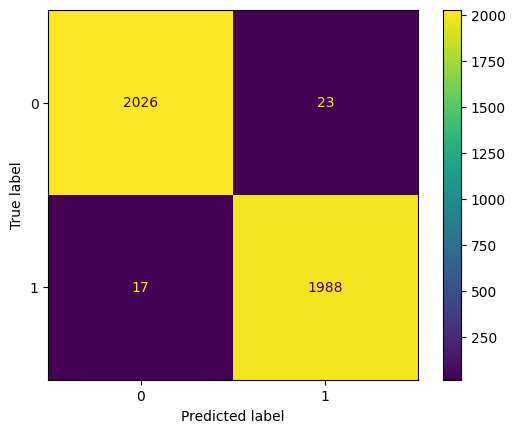



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2049
           1       0.99      0.99      0.99      2005

    accuracy                           0.99      4054
   macro avg       0.99      0.99      0.99      4054
weighted avg       0.99      0.99      0.99      4054

Roc auc score 0.9901481046042775
F1 Score: 0.9900398406374502


In [19]:
X = df.drop('X65', axis=1)
y = df['X65']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=75, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

c_m = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(c_m)
disp.plot()
plt.show()
print('\n')
print(classification_report(y_test,pred))
print(f"Roc auc score {roc_auc_score(y_test, pred)}")  
print(f'F1 Score: {f1_score(y_test, pred)}') 

## Testing the model on unknown data

In [20]:
df_test = pd.read_csv('test_unlabeled.csv',header=None)

df_test.columns = column_names[:-1]

df_test.head()



,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X66,X63,X64
0,0.214080,0.363990,0.516280,10.424,219.53,0.34608,0.215990,1.7348,1.3125,0.63144,0.215990,3.9427,0.29102,0.215990,488.76,0.74678,2.7473,0.215990,0.23124,44.479,1.331,0.222710,0.22919,0.35214,0.63144,0.74154,3.1294,1.2036,5.3430,0.36395,0.23124,28.096,12.991,0.61186,0.222710,0.93941,1.4787,0.94065,0.23844,0.48506,0.042961,0.23844,212.77,168.29,1.8808,8.3466,58.378,0.166880,0.17866,1.5689,0.054781,0.076976,1.4721,2.1929,113740.0,0.23808,0.33903,0.76192,0.48969,8.2061,2.1689,21.407,17.05,2.1776
1,-0.076930,0.473700,0.031616,1.088,-68.271,0.11065,-0.065768,0.74646,1.0716,0.35360,-0.065768,-0.18316,0.021692,-0.065768,7042,0.051832,2.111,-0.065768,-0.058105,68.901,0.98194,-0.040117,-0.067966,0.16925,0.35360,0.02827,-0.37982,0.051889,5.1987,0.40483,-0.058105,124.09,2.9414,-0.084689,-0.040117,1.15550,1.5445,0.46822,-0.035443,0.046253,0.31021,-0.035443,120.63,51.732,-0.36004,0.49301,73.838,-0.130440,-0.11524,0.82478,0.359080,0.33997,0.58033,0.76845,4996.0,0.066855,-0.21756,0.93315,0.32415,5.2974,7.0556,115.79,3.1521,1.8577
2,0.010854,0.427760,0.508810,2.1905,31.262,0.00000,0.011093,1.3377,1.5918,0.57224,0.027665,0.025956,0.014039,0.011093,6986.7,0.052242,2.3377,0.011093,0.006969,84.426,1.1658,0.026396,0.006818,0.064145,0.56629,0.051682,1.5928,7.974,3.9243,0.26586,0.009408,98.797,3.6944,3.6911,0.012898,1.59180,?,0.57224,0.008103,0.021135,0.37871,0.016582,212.59,128.17,0.029478,1.329,85.116,0.015142,0.009512,2.1886,0.427380,0.27068,8.968,8.968,4274.1,0.008103,0.018967,0.99313,0,4.3233,2.8478,97.997,3.7246,24.947
3,-1.091000,0.029971,0.636780,22.246,184.02,-0.37692,-1.091000,32.365,0.76382,0.97003,-1.091000,-36.4,-13.206,-1.091000,-10.027,-36.4,33.365,-1.091000,-13.206,0,0.87924,-0.028453,-13.206,-0.37692,0.97003,-36.4,-2.6307,1.9109,3.4748,-0.60905,-13.206,101.15,3.6087,-0.94935,-0.028453,0.19192,?,0.97003,-0.34442,22.081,-0.034631,-0.34442,21.957,21.957,?,22.246,0,-0.028453,-0.34442,22.246,0.029971,0.27711,2.9109,2.9109,1900.3,-0.30921,-1.1247,1.3092,0,?,16.624,132.42,2.7564,0.2479
4,0.294390,0.571270,0.068046,1.1202,0.49422,0.51728,0.294390,0.70034,1.158,0.40008,0.294390,0.51996,0.15683,0.294390,628.22,0.58101,1.7505,0.294390,0.1391,8.2155,1.6868,0.290540,0.1391,0.51728,0.40008,0.58101,1.5898,0.18603,4.5604,0.10883,0.1391,113.08,3.2279,0.5086,0.290540,2.13150,115.32,0.40517,0.13728,0.63389,0.057249,0.13728,47.485,39.27,6.18,1.036,9.5139,0.253020,0.11955,1.1102,0.566180,0.3098,1.0938,1.1077,2473.0,0.13647,0.73583,0.86353,0.012714,44.428,9.2947,97.646,3.738,5.786


In [21]:
df_test.drop(columns=['X21','X37'], inplace=True)

In [22]:
df_test.replace('?', np.nan, inplace=True)
for col in df_test.columns:
    mean=df_test[col].astype(float).mean()
    df_test[col] = df_test[col].fillna(mean)
    
df_test.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
X58    0
X59    0
X60    0
X61    0
X66    0
X63    0
X64    0
dtype: int64

In [106]:
'''
df_test = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns, index=df_test.index)
df_test.head()
'''

'\ndf_test = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns, index=df_test.index)\ndf_test.head()\n'

Add ID column (starting with 1):

In [23]:
df_test['ID'] = df_test.index + 1
df_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X66,X63,X64,ID
0,0.214080,0.363990,0.516280,10.424,219.53,0.34608,0.215990,1.7348,1.3125,0.63144,0.215990,3.9427,0.29102,0.215990,488.76,0.74678,2.7473,0.215990,0.23124,44.479,0.222710,0.22919,0.35214,0.63144,0.74154,3.1294,1.2036,5.3430,0.36395,0.23124,28.096,12.991,0.61186,0.222710,0.93941,0.94065,0.23844,0.48506,0.042961,0.23844,212.77,168.29,1.8808,8.3466,58.378,0.166880,0.17866,1.5689,0.054781,0.076976,1.4721,2.1929,113740.0,0.23808,0.33903,0.76192,0.48969,8.2061,2.1689,21.407,17.05,2.1776,1
1,-0.076930,0.473700,0.031616,1.088,-68.271,0.11065,-0.065768,0.74646,1.0716,0.35360,-0.065768,-0.18316,0.021692,-0.065768,7042,0.051832,2.111,-0.065768,-0.058105,68.901,-0.040117,-0.067966,0.16925,0.35360,0.02827,-0.37982,0.051889,5.1987,0.40483,-0.058105,124.09,2.9414,-0.084689,-0.040117,1.15550,0.46822,-0.035443,0.046253,0.31021,-0.035443,120.63,51.732,-0.36004,0.49301,73.838,-0.130440,-0.11524,0.82478,0.359080,0.33997,0.58033,0.76845,4996.0,0.066855,-0.21756,0.93315,0.32415,5.2974,7.0556,115.79,3.1521,1.8577,2
2,0.010854,0.427760,0.508810,2.1905,31.262,0.00000,0.011093,1.3377,1.5918,0.57224,0.027665,0.025956,0.014039,0.011093,6986.7,0.052242,2.3377,0.011093,0.006969,84.426,0.026396,0.006818,0.064145,0.56629,0.051682,1.5928,7.974,3.9243,0.26586,0.009408,98.797,3.6944,3.6911,0.012898,1.59180,0.57224,0.008103,0.021135,0.37871,0.016582,212.59,128.17,0.029478,1.329,85.116,0.015142,0.009512,2.1886,0.427380,0.27068,8.968,8.968,4274.1,0.008103,0.018967,0.99313,0,4.3233,2.8478,97.997,3.7246,24.947,3
3,-1.091000,0.029971,0.636780,22.246,184.02,-0.37692,-1.091000,32.365,0.76382,0.97003,-1.091000,-36.4,-13.206,-1.091000,-10.027,-36.4,33.365,-1.091000,-13.206,0,-0.028453,-13.206,-0.37692,0.97003,-36.4,-2.6307,1.9109,3.4748,-0.60905,-13.206,101.15,3.6087,-0.94935,-0.028453,0.19192,0.97003,-0.34442,22.081,-0.034631,-0.34442,21.957,21.957,5.195404,22.246,0,-0.028453,-0.34442,22.246,0.029971,0.27711,2.9109,2.9109,1900.3,-0.30921,-1.1247,1.3092,0,56.826958,16.624,132.42,2.7564,0.2479,4
4,0.294390,0.571270,0.068046,1.1202,0.49422,0.51728,0.294390,0.70034,1.158,0.40008,0.294390,0.51996,0.15683,0.294390,628.22,0.58101,1.7505,0.294390,0.1391,8.2155,0.290540,0.1391,0.51728,0.40008,0.58101,1.5898,0.18603,4.5604,0.10883,0.1391,113.08,3.2279,0.5086,0.290540,2.13150,0.40517,0.13728,0.63389,0.057249,0.13728,47.485,39.27,6.18,1.036,9.5139,0.253020,0.11955,1.1102,0.566180,0.3098,1.0938,1.1077,2473.0,0.13647,0.73583,0.86353,0.012714,44.428,9.2947,97.646,3.738,5.786,5


In [24]:
X_df_test = df_test.drop('ID', axis=1)

predictions = model.predict(X_df_test)

# Probabilities that the prediction is 1

probabilities = model.predict_proba(X_df_test)[:, 1]

### create the csv files:

In [25]:

predictions_df = pd.DataFrame( predictions, columns=['Prediction'])
predictions_df.to_csv('it2021091_predictions.csv', index=False)

In [26]:
probabilities_df = pd.DataFrame({ 'ID': df_test['ID'],'Probability': probabilities })

probabilities_df = probabilities_df.sort_values(by='Probability', ascending=False)

top_50 = probabilities_df.head(50)

top_50[['ID']].to_csv('it2021091_top50.csv', index=False)

# C) Evaluation of features

## Correlation

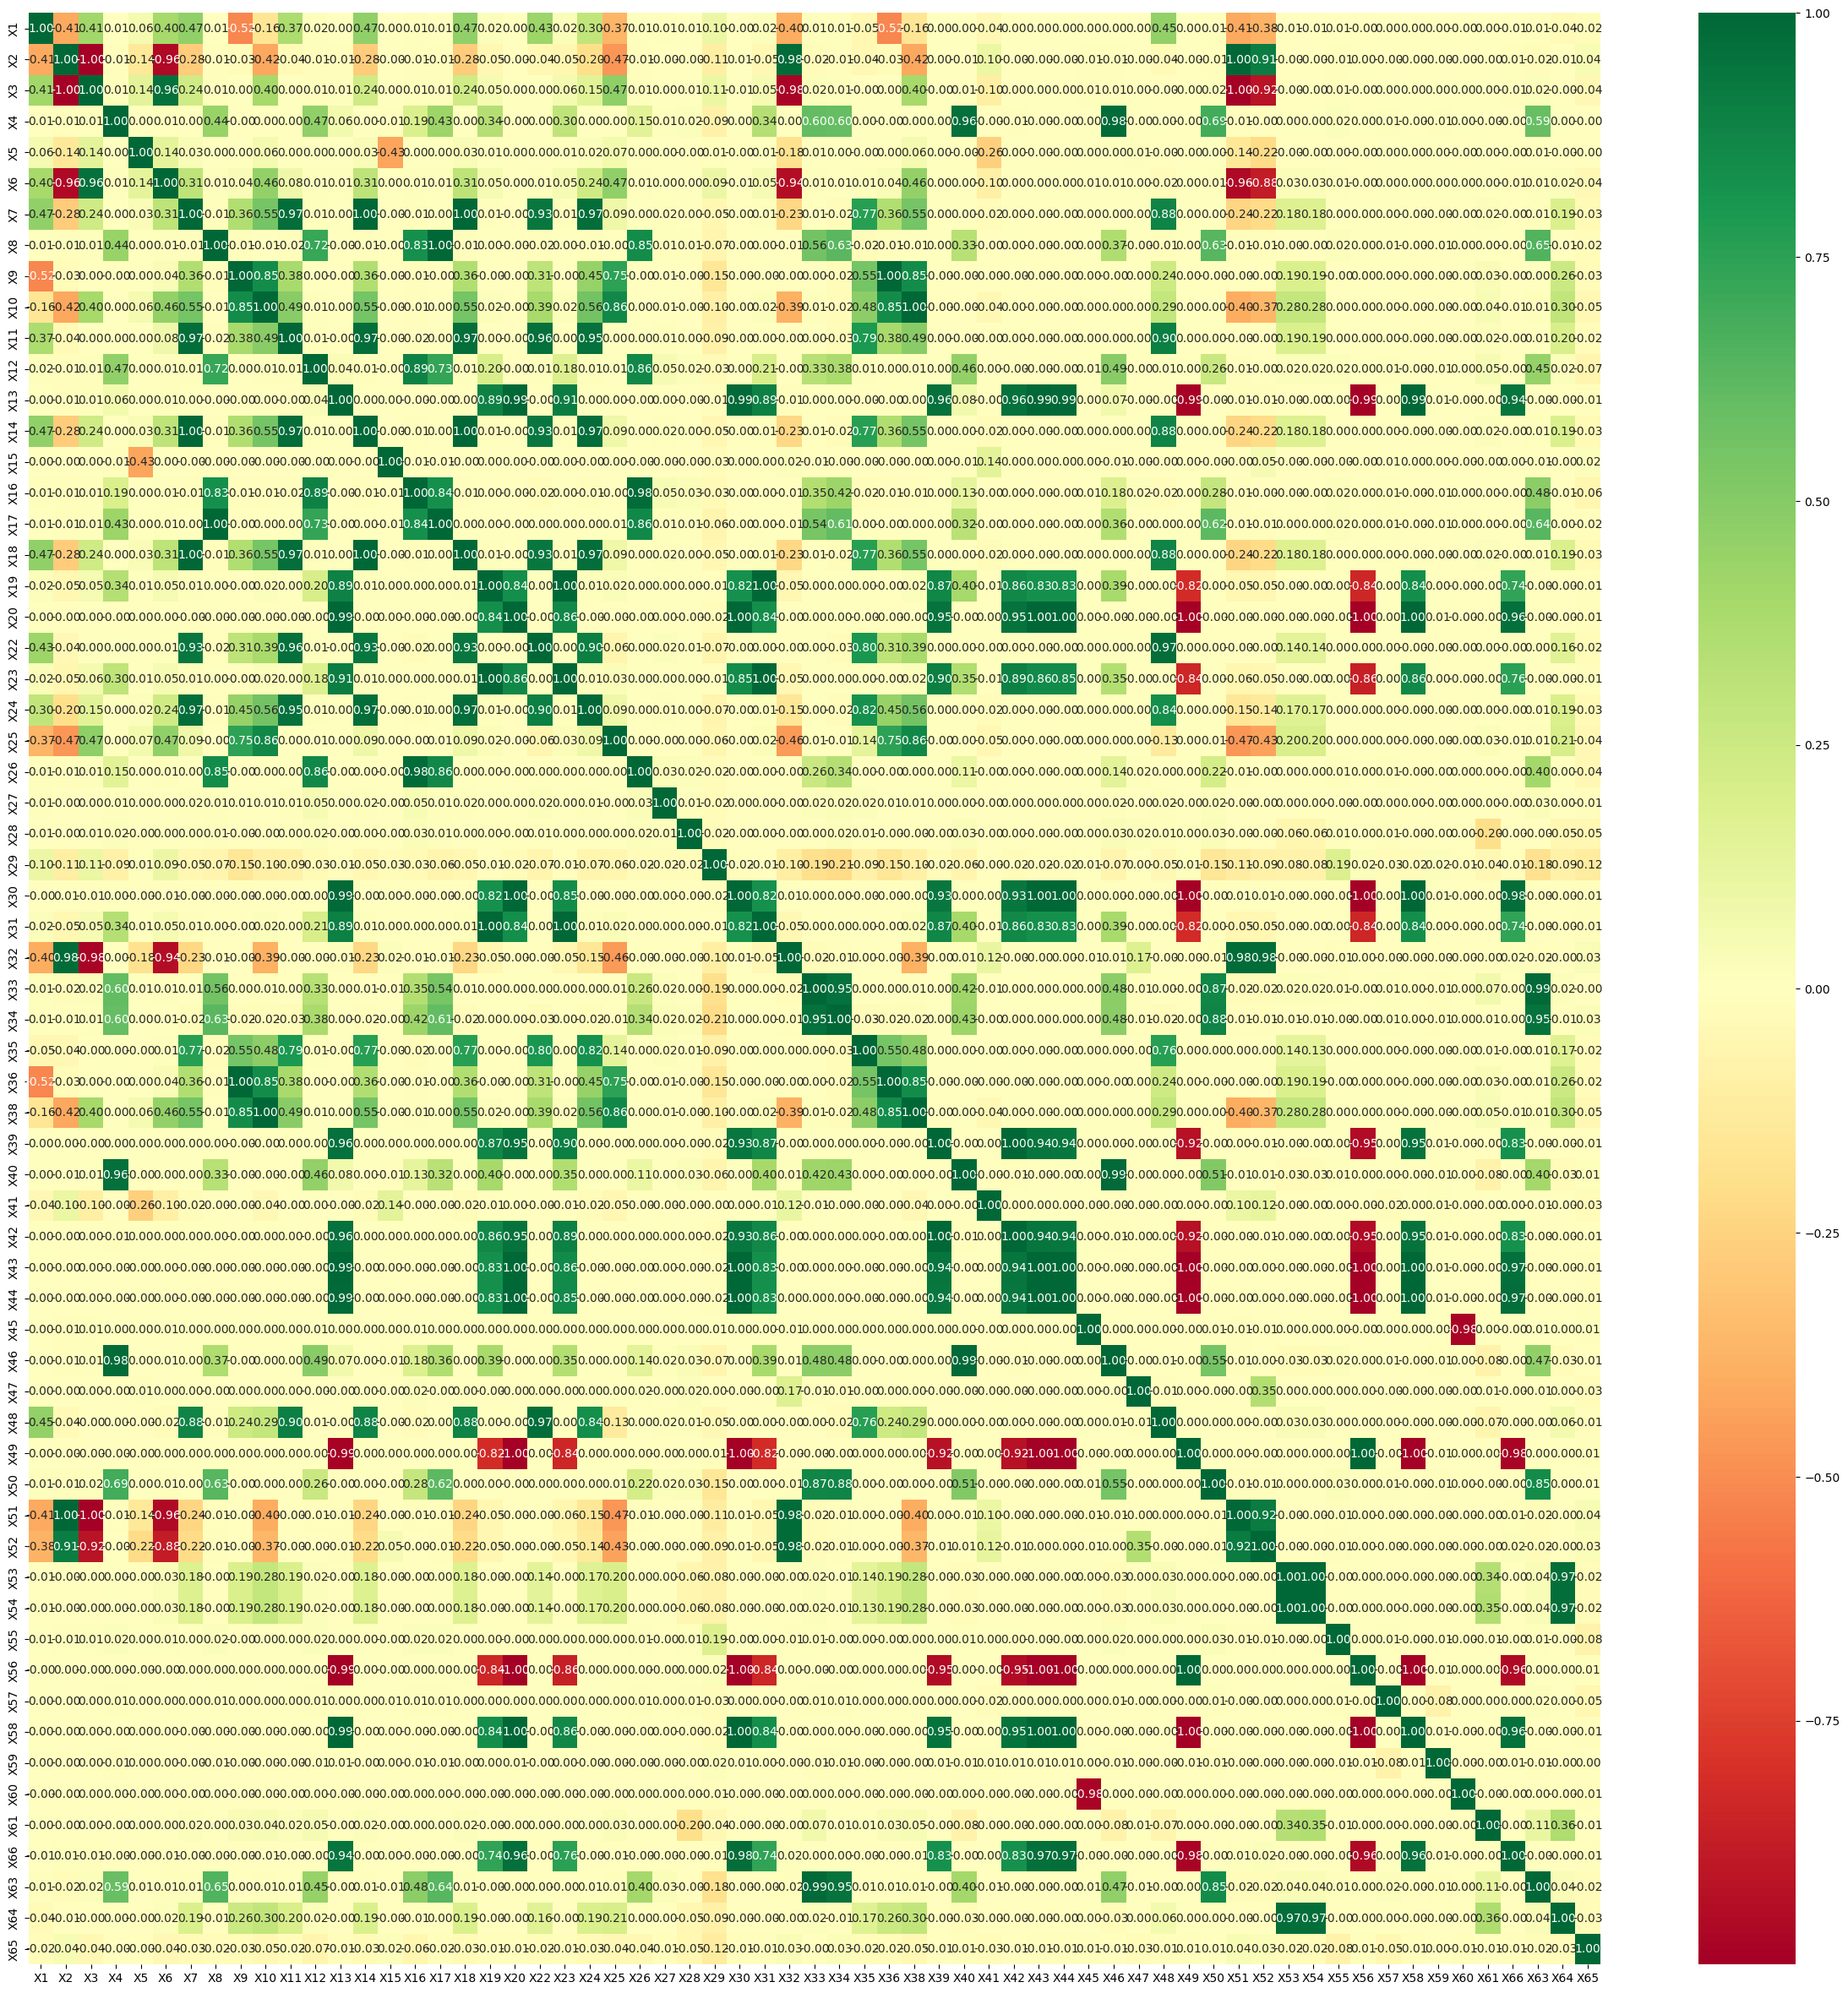

In [20]:
corr_map = df.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(corr_map, annot=True, cmap='RdYlGn', fmt='.2f')
plt.show()

Take the top 10 correlations with the target value

In [21]:
top_corr_features =  corr_map['X65'].abs().sort_values(ascending=False)
top_corr_features.head(11).iloc[1:]

X29    0.120836
X55    0.082112
X12    0.067392
X16    0.058375
X57    0.053741
X28    0.049668
X10    0.045962
X38    0.045878
X2     0.044997
X3     0.044122
Name: X65, dtype: float64

## Feature importance

In [22]:
from sklearn.inspection import permutation_importance

results = permutation_importance(model, X_test, y_test,  n_repeats=10, random_state=42,n_jobs=-1)


In [23]:
importance_df = pd.DataFrame({'feature': X.columns, 'importance_mean': results.importances_mean})  
importance_df = importance_df.sort_values(by='importance_mean', ascending=False)  

In [24]:
importance_df

,feature,importance_mean
25,X27,0.166206
22,X24,0.043291
55,X58,0.009916
43,X46,0.007055
10,X11,0.006487
56,X59,0.005032
5,X6,0.003305
4,X5,0.002319
32,X34,0.002171
42,X45,0.001875


C:\Users\John skoul\AppData\Local\Temp\ipykernel_8496\2939428028.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='importance_mean', x='feature', data=importance_df, palette='viridis')


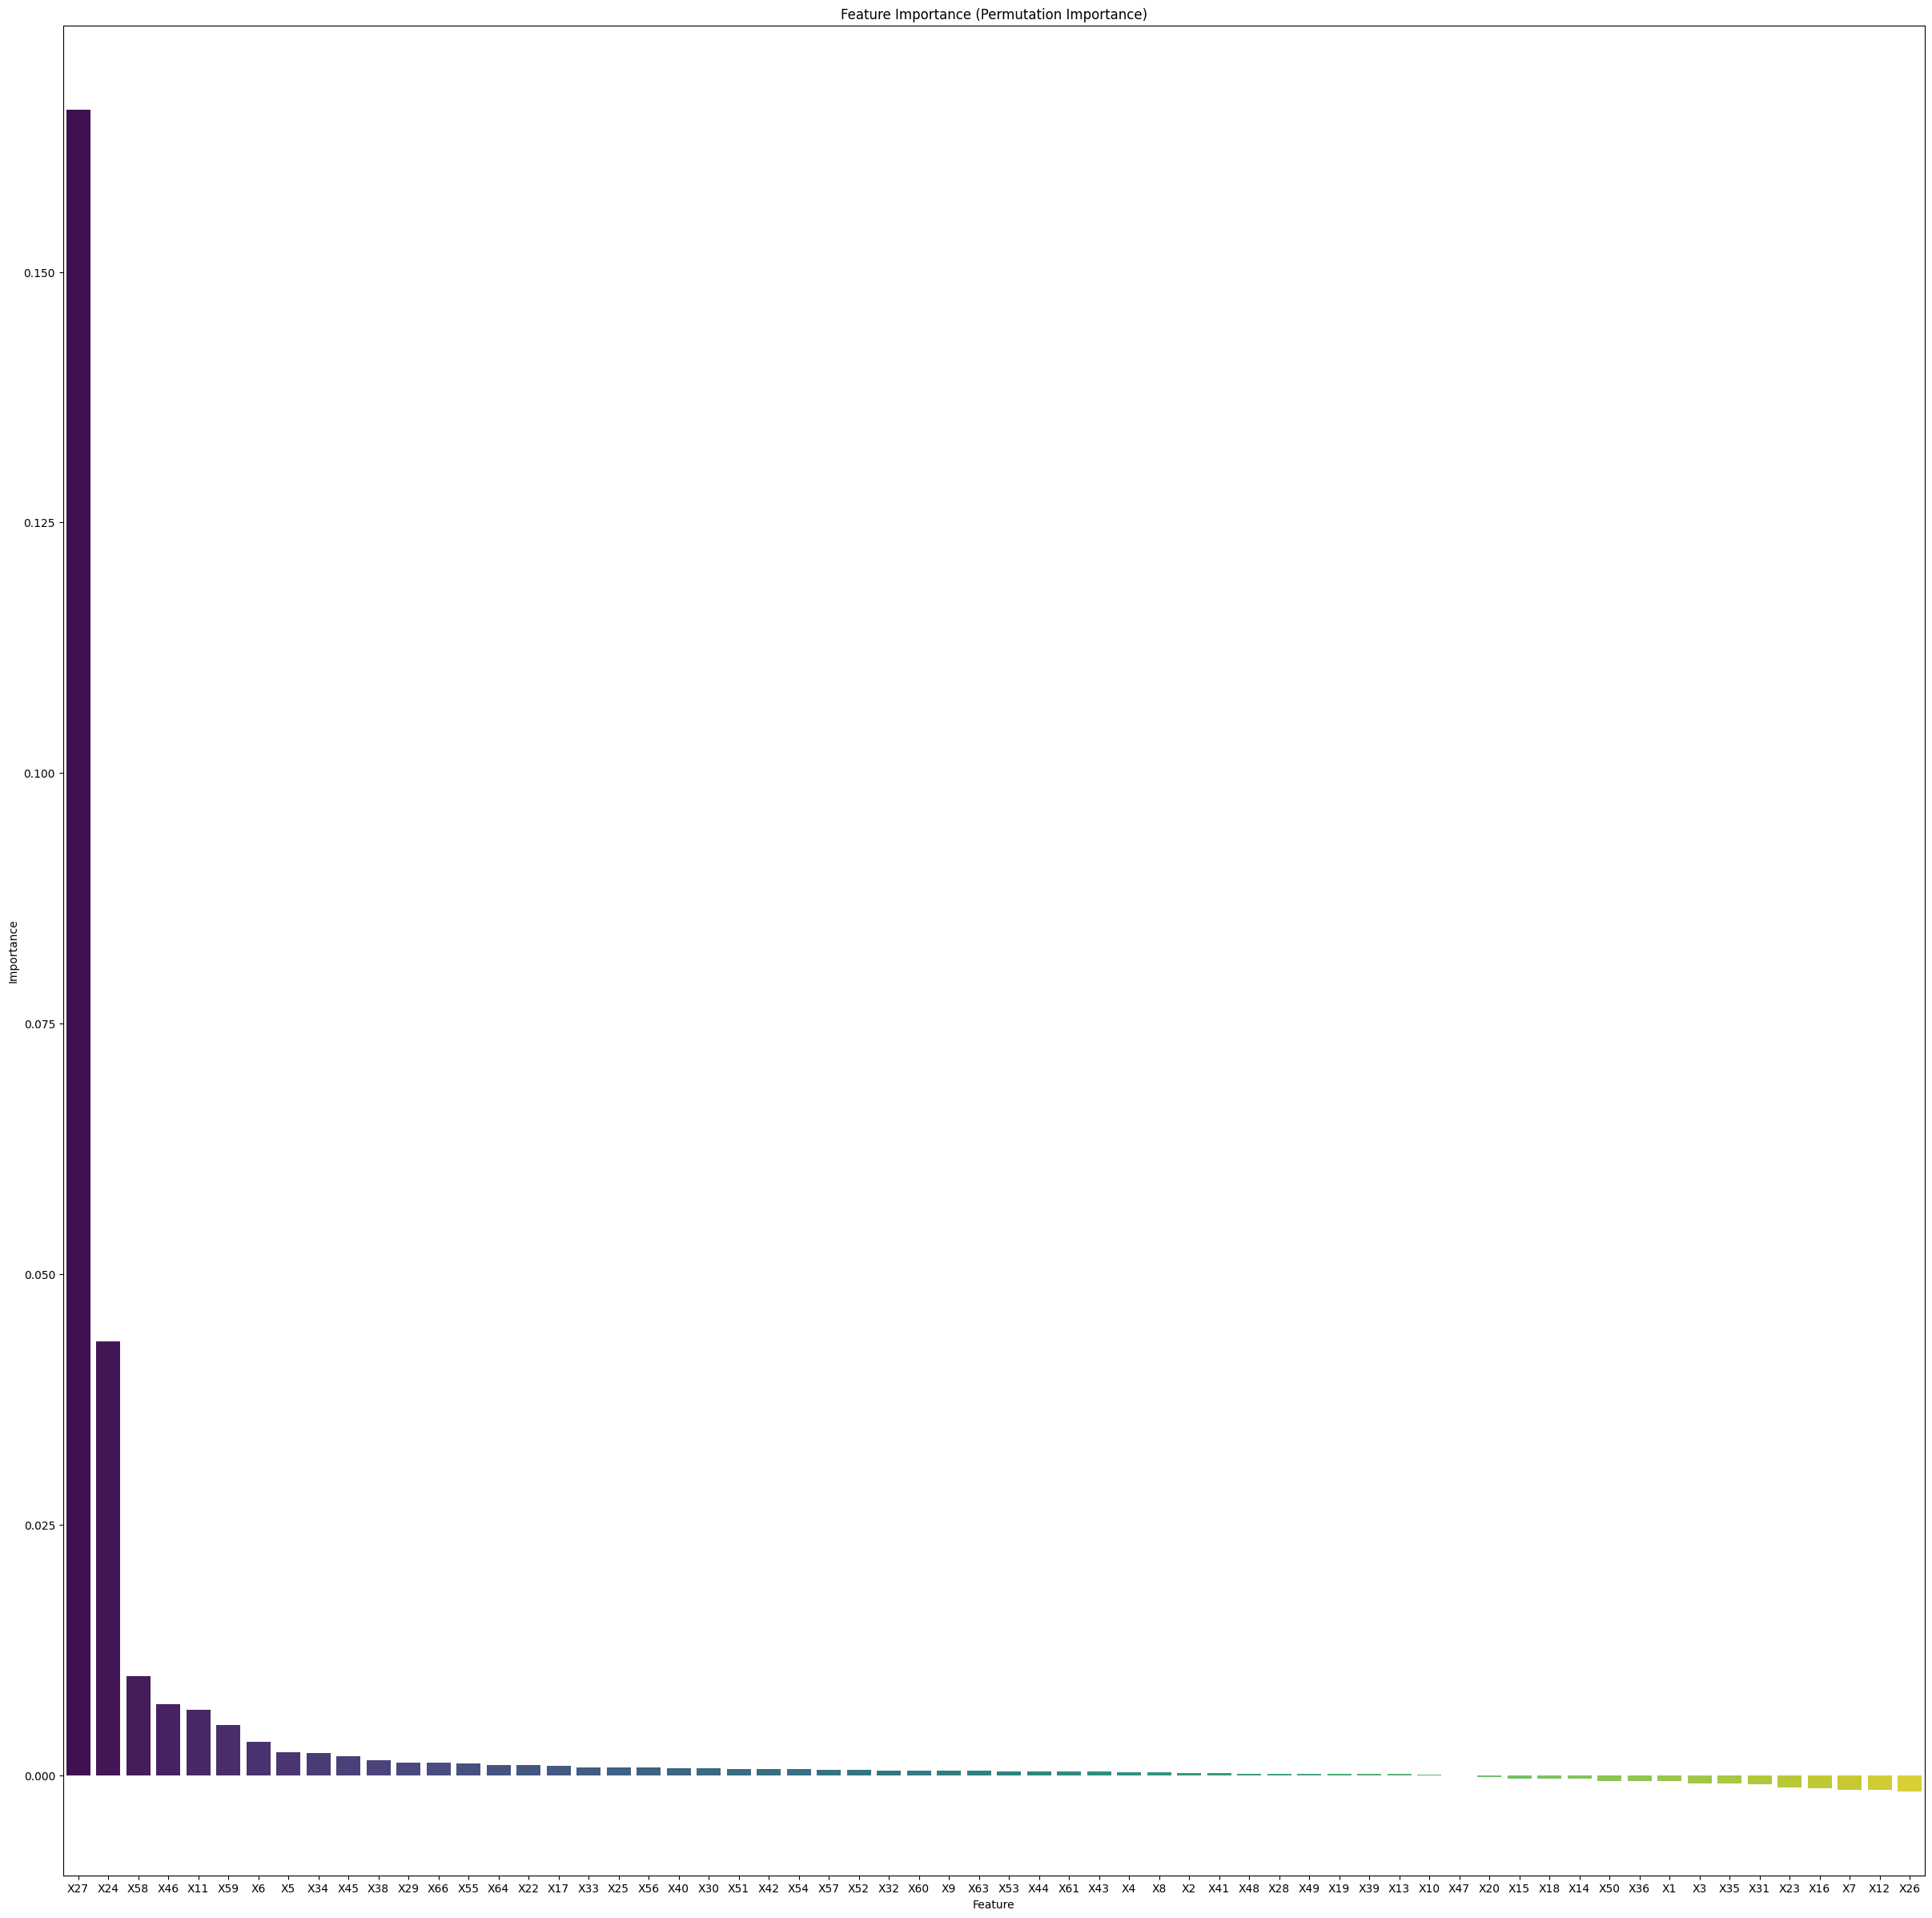

In [25]:
plt.figure(figsize=(30, 30))
sns.barplot(y='importance_mean', x='feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (Permutation Importance)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

Take the top 10 importance_mean scores

In [73]:
importance_df.head(10)


,feature,importance_mean
25,X27,0.166206
22,X24,0.043291
55,X58,0.009916
43,X46,0.007055
10,X11,0.006487
56,X59,0.005032
5,X6,0.003305
4,X5,0.002319
32,X34,0.002171
42,X45,0.001875


In [74]:
top_corr_features.head(11).iloc[1:]

X29    0.120836
X55    0.082112
X12    0.067392
X16    0.058375
X57    0.053741
X28    0.049668
X10    0.045962
X38    0.045878
X2     0.044997
X3     0.044122
Name: X65, dtype: float64

## Comparing model with all features and the top 10 features

In [79]:
selected_columns =['X27', 'X29', 'X24', 'X55', 'X12', 'X16', 'X57', 'X58', 'X28','X46', 'X65']
df_top_10_features = df[selected_columns]
df_top_10_features.head()

,X27,X29,X24,X55,X12,X16,X57,X58,X28,X46,X65
0,1.4582,5.9443,0.47706,348690.0,0.6598,0.73378,0.39718,0.87804,1.7615,1.5225,0
1,88.444,3.6884,0.540231,2304.6,0.5168,0.53838,0.42002,0.85300,16.946,1.1252,0
2,86.011,4.3749,0.540231,6332.7,0.64184,0.45961,0.81774,0.76599,1.0627,1.0101,0
3,0.94076,4.6511,0.17193,20545.0,0.30163,0.39803,0.14207,0.94598,1.9618,1.5696,0
4,1.4138,4.1424,0.18732,3186.6,0.33147,0.32211,0.48431,0.86515,1.1184,0.95787,0


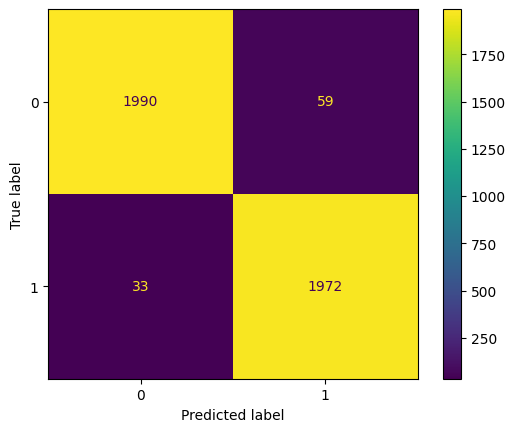



              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2049
           1       0.97      0.98      0.98      2005

    accuracy                           0.98      4054
   macro avg       0.98      0.98      0.98      4054
weighted avg       0.98      0.98      0.98      4054

Roc auc score 0.9773733066065924
F1 Score: 0.977205153617443


In [80]:
X=df_top_10_features.drop('X65', axis=1)
y=df_top_10_features['X65']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_10_features = RandomForestClassifier(n_estimators=75, random_state=42)

model_10_features.fit(X_train, y_train)

pred = model_10_features.predict(X_test)

c_m = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(c_m)
disp.plot()
plt.show()

print('\n')
print(classification_report(y_test,pred))
print(f"Roc auc score {roc_auc_score(y_test, pred)}")  
print(f'F1 Score: {f1_score(y_test, pred)}')